# Multinomial Naive Bayes

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
reddit_df = pd.read_csv('../data/reddit_df.csv')

In [6]:
X = reddit_df['full_text_clean']
y = reddit_df['subreddit']

X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y )

In [7]:
mnb_cvec = make_pipeline(CountVectorizer(), MultinomialNB())
mnb_tfi = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [9]:
mnb_cvec.fit(X_train, y_train)
mnb_tfi.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [14]:
mnb_cvec.score(X_train, y_train)

0.9465061852223337

In [15]:
mnb_cvec.score(X_test, y_test)

0.8496993987975952

### CVec Scores:

**Train:** $0.947$

**Test:** $0.850$

In [16]:
mnb_tfi.score(X_train, y_train)

0.9501838849882982

In [17]:
mnb_tfi.score(X_test, y_test)

0.8256513026052105

### Tfidif Scores:

**Train:** $0.950$

**Test:** $0.826$

### Calculating other classification metrics

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
cvec_preds = mnb_cvec.predict(X_test)
tfi_preds = mnb_tfi.predict(X_test)

In [26]:
tfi_mat = confusion_matrix(y_test, tfi_preds)
cvec_mat = confusion_matrix(y_test, cvec_preds)

In [25]:
tn_cvec, fp_cvec, fn_cvec, tp_cvec = confusion_matrix(y_test, cvec_preds).ravel()
tn_tfi, fp_tfi, fn_tfi, tp_tfi = confusion_matrix(y_test, tfi_preds).ravel()

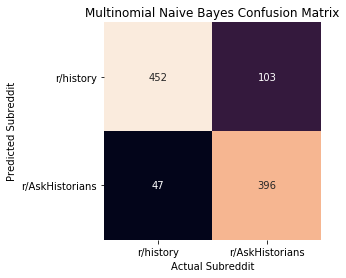

In [97]:
sns.heatmap(cvec_mat.T, cmap='rocket', square=True, annot=True, fmt='d', cbar=False,
           xticklabels=['r/history', 'r/AskHistorians'],
           yticklabels=['r/history', 'r/AskHistorians']
           )

plt.yticks(rotation=0)
plt.xlabel('Actual Subreddit')
plt.ylabel('Predicted Subreddit')
plt.title('Multinomial Naive Bayes Confusion Matrix');

Confusion matrix for the MNB, the classification report below summarizes the important scores I cared about.

In [101]:
print(classification_report(y_test, cvec_preds, target_names=['r/history', 'r/AskHistorians']))

                 precision    recall  f1-score   support

      r/history       0.81      0.91      0.86       499
r/AskHistorians       0.89      0.79      0.84       499

       accuracy                           0.85       998
      macro avg       0.85      0.85      0.85       998
   weighted avg       0.85      0.85      0.85       998



|Classification Report        |precision  | recall    | f1-score |  support |
|----------------|-----------|----------|-----------|----------|
|      r/history |      0.81 |     0.91 |      0.86 |       499|
|r/AskHistorians |      0.89 |     0.79 |      0.84 |       499|
|       accuracy |        ---   |     ---     |      0.85 |       998|
|      macro avg |      0.85 |     0.85 |      0.85 |       998|
|   weighted avg |      0.85 |     0.85 |      0.85 |       998|

Note: Support is the sample size

Naive Bayes did not perform nearly as well as the other two models but still better than the baseline